# EDA of Cross-Selling recommendation_Gladys Kalas

In [1]:
import os
file_path = '/content/drive/MyDrive/Cross_Selling/Train2.csv'

def get_size(file_path, unit='bytes'):
    file_size = os.path.getsize(file_path)
    exponents_map = {'bytes': 0, 'kb': 1, 'mb': 2, 'gb': 3}
    if unit not in exponents_map:
        raise ValueError("Must select from \
        ['bytes', 'kb', 'mb', 'gb']")
    else:
        size = file_size / 1024 ** exponents_map[unit]
        return round(size, 3)

print(get_size(file_path,'gb'))


3.005


In [2]:
#Import Libraries:

import pandas as pd
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [3]:
path='/content/drive/MyDrive/Cross_Selling/Train2.csv'

In [4]:
#Load the Train data set in chunks as the file is large:

dftrain = pd.DataFrame()
for chunk in pd.read_csv(path, chunksize = 100000, low_memory=False):
   dftrain=pd.concat([dftrain,chunk])

In [ ]:
#To see all the columns in the data frame set pandas to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#Check the shape of the dataframe. The dataframe has 13647309 rows and 48 columns.
dftrain.shape

(13393927, 49)

# Data set details and data types

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393927 entries, 0 to 13393926
Data columns (total 49 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Date                  object 
 2   Customer_code         int64  
 3   Employee_index        object 
 4   Country               object 
 5   Gender                object 
 6   Age                   int64  
 7   Customer_join_date    object 
 8   Customer_index        object 
 9   Customer_seniority    int64  
 10  Primary_customer      float64
 11  Customer_leave_date   object 
 12  Customer_type         object 
 13  Customer_relation     object 
 14  Residence_index       object 
 15  Foreigner_index       object 
 16  Spouse_index          object 
 17  Channel               object 
 18  Deceased_index        object 
 19  Primary_address       float64
 20  Customer_address      float64
 21  Province_name         object 
 22  Activity_index        object 
 23  Gross

In [ ]:
dftrain.head(7)

,Unnamed: 0,Date,Customer_code,Employee_index,Country,Gender,Age,Customer_join_date,Customer_index,Customer_seniority,Primary_customer,Customer_leave_date,Customer_type,Customer_relation,Residence_index,Foreigner_index,Spouse_index,Channel,Deceased_index,Primary_address,Customer_address,Province_name,Activity_index,Gross_income,Segmentation,Saving_account,Guarantees,Current_accounts,Derivative_account,Payroll_account,Junior_account,More_private_account,Private_account,Private_plus_account,Short_term_deposits,Medium_term_deposits,Long_term_deposits,E_account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions_2,Direct_debit
0,0,2015-01-28,1375586,Not-employee,ES,Male,35,2015-01-12,Old-customer,6,1.0,0,Primary-customer,Active,Yes,No,Not Applicable,KHL,No,1.0,29.0,MALAGA,Active,87218.10,Individual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,Yes,Not Applicable,KHE,No,1.0,13.0,CIUDAD REAL,Inactive,35548.74,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHE,No,1.0,13.0,CIUDAD REAL,Inactive,122179.11,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,Not-employee,ES,Male,22,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHD,No,1.0,50.0,ZARAGOZA,Inactive,119775.54,College-graduate,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Active,Yes,No,Not Applicable,KHE,No,1.0,50.0,ZARAGOZA,Active,451931.22,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,5,2015-01-28,1050615,Not-employee,ES,Male,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHE,No,1.0,45.0,TOLEDO,Inactive,22220.04,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,6,2015-01-28,1050616,Not-employee,ES,Male,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHE,No,1.0,24.0,LEON,Inactive,295590.36,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
dftrain.isnull().sum()

Unnamed: 0              0
Date                    0
Customer_code           0
Employee_index          0
Country                 0
Gender                  0
Age                     0
Customer_join_date      0
Customer_index          0
Customer_seniority      0
Primary_customer        0
Customer_leave_date     0
Customer_type           0
Customer_relation       0
Residence_index         0
Foreigner_index         0
Spouse_index            0
Channel                 0
Deceased_index          0
Primary_address         0
Customer_address        0
Province_name           0
Activity_index          0
Gross_income            0
Segmentation            0
Saving_account          0
Guarantees              0
Current_accounts        0
Derivative_account      0
Payroll_account         0
Junior_account          0
More_private_account    0
Private_account         0
Private_plus_account    0
Short_term_deposits     0
Medium_term_deposits    0
Long_term_deposits      0
E_account               0
Funds       

In [ ]:
#EDA :

In [ ]:
#Residence_index:

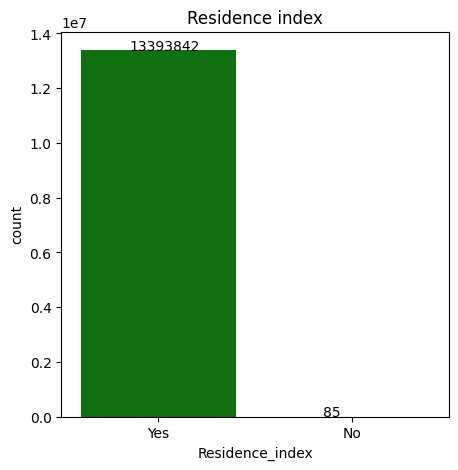

In [8]:
#Residence index:
plt.figure(figsize=(5,5))
plt.title('Residence index')
ax=sns.countplot(data=dftrain,x='Residence_index',palette=['Green','Red'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

In [9]:
dftrain['Residence_index'].value_counts(normalize=True)


Yes    0.999994
No     0.000006
Name: Residence_index, dtype: float64

99% of the customers reside in the country same as the XYZ credit union bank 

In [10]:
#Foreigner_index:
dftrain['Foreigner_index'].value_counts(normalize=True)

No     0.956493
Yes    0.043507
Name: Foreigner_index, dtype: float64

95% of the customers are non-foreigners while the 4% population are foreign nationals

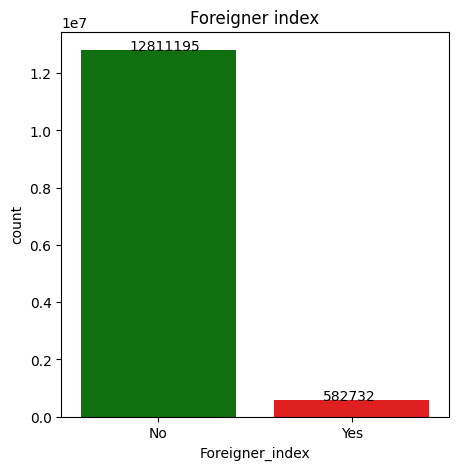

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Foreigner index')
ax=sns.countplot(data=dftrain,x='Foreigner_index',palette=['Green','Red'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

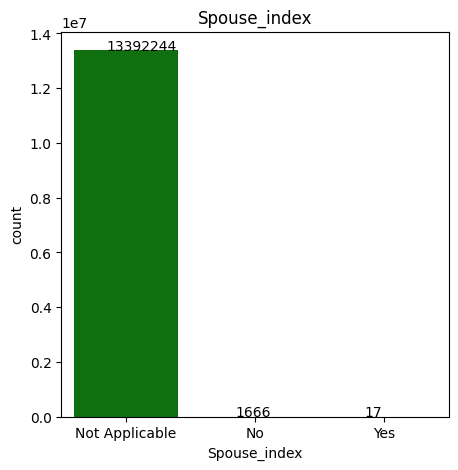

In [ ]:
#Spouse_index:

plt.figure(figsize=(5,5))
plt.title('Spouse_index')
ax=sns.countplot(data=dftrain,x='Spouse_index',palette=['Green','Red'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

In [12]:
dftrain['Spouse_index'].value_counts(normalize=True)

Not Applicable    0.999874
No                0.000124
Yes               0.000001
Name: Spouse_index, dtype: float64

99.9% of the data contains null or no data hence this is inconclusive and unclear to interpret

In [14]:
#Deceased_index
dftrain['Deceased_index'].value_counts(normalize=True)

No     0.997575
Yes    0.002425
Name: Deceased_index, dtype: float64

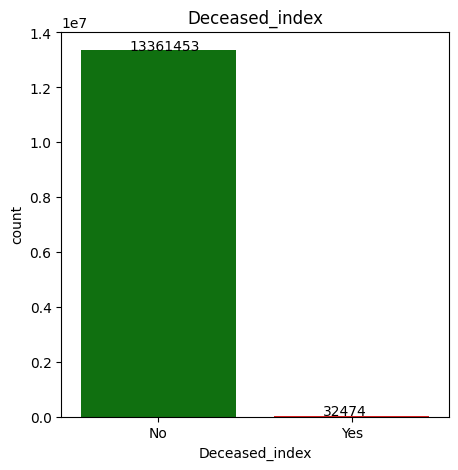

In [16]:

plt.figure(figsize=(5,5))
plt.title('Deceased_index')
ax=sns.countplot(data=dftrain,x='Deceased_index',palette=['Green','Red'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

In [61]:
#Activity_index
dftrain['Activity_index'].value_counts(normalize=True)

Inactive    0.540558
Active      0.459442
Name: Activity_index, dtype: float64

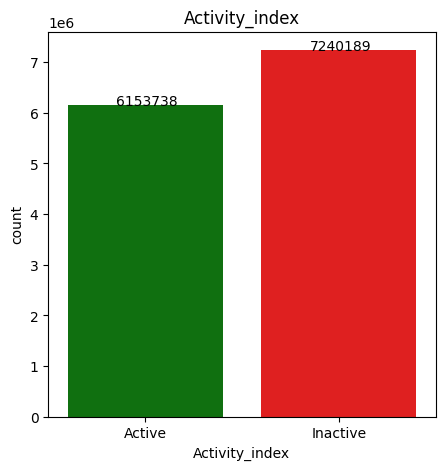

In [63]:
plt.figure(figsize=(5,5))
plt.title('Activity_index')
ax=sns.countplot(data=dftrain,x='Activity_index',palette=['Green','Red'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

45.9% are active account holders in the bank

In [101]:
#Segentation
dftrain['Segmentation'].value_counts()

Individual          7901219
College-graduate    4930286
VIP                  558361
Unknown                4061
Name: Segmentation, dtype: int64

<Axes: ylabel='Segmentation'>

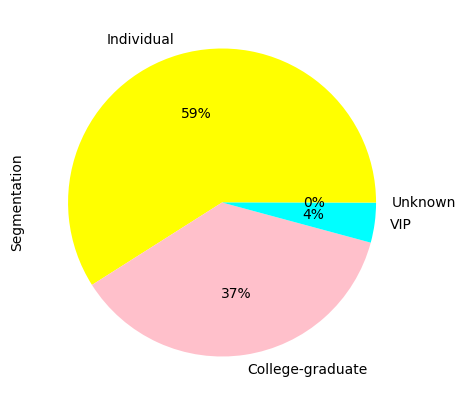

In [ ]:
#Segentation
mycolor=['yellow','pink','cyan']
dftrain.Segmentation.value_counts().plot.pie(y='Segmentation', figsize=(5, 5), autopct='%1.0f%%',colors=mycolor)

In [13]:
dftrain['Segmentation'].value_counts(normalize=True)

Individual          0.589911
College-graduate    0.368099
VIP                 0.041688
Unknown             0.000303
Name: Segmentation, dtype: float64

Individuals form the highest accounts holder population followed by college graduates and VIPs

In [ ]:
#Gross_income aross segments and country of residence:

In [15]:
income = dftrain.groupby(['Segmentation','Residence_index'])['Gross_income'].sum().unstack().fillna(0)
income

Residence_index,No,Yes
Segmentation,,
College-graduate,0.00,9.554698e+11
Individual,19772193.72,1.546416e+12
Unknown,0.00,1.176872e+09
VIP,451931.22,1.199154e+11


<Figure size 1600x900 with 0 Axes>

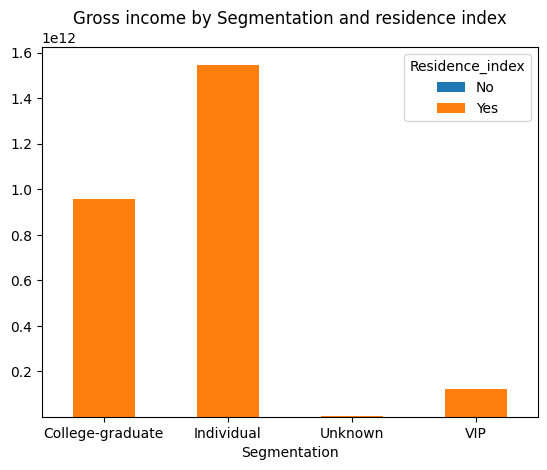

<Figure size 1600x900 with 0 Axes>

In [12]:
income.plot(kind='bar', stacked=True)
plt.title('Gross income by Segmentation and residence index')
plt.xticks(rotation=0, ha='center')
plt.figure(figsize=(16,9))

Individuals form the highest income earners and belong to the same country as the bank

In [16]:
income2 = dftrain.groupby(['Segmentation','Deceased_index'])['Gross_income'].sum().unstack().fillna(0)
income2

Deceased_index,No,Yes
Segmentation,,
College-graduate,9.554582e+11,1.164659e+07
Individual,1.539848e+12,6.587808e+09
Unknown,1.176216e+09,6.557856e+05
VIP,1.194221e+11,4.936846e+08


(array([0, 1, 2, 3]),
 [Text(0, 0, 'College-graduate'),
  Text(1, 0, 'Individual'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'VIP')])

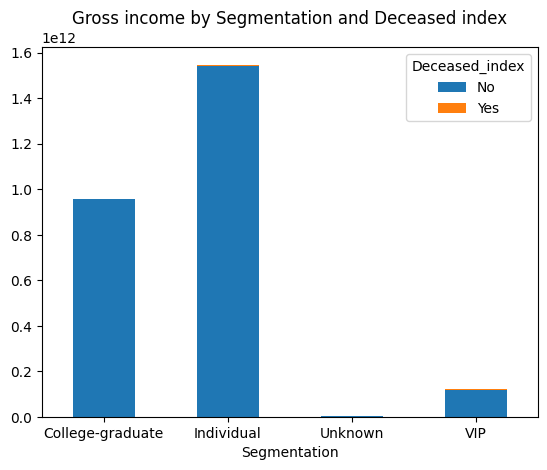

In [ ]:
income2.plot(kind='bar', stacked=True)
plt.title('Gross income by Segmentation and Deceased index')
plt.xticks(rotation=0, ha='center')

Income highest among 'Individuals(customers) and not deceased

In [20]:
# Channel

custchannel=dftrain.groupby(['Channel']).count()['Customer_code']
a=custchannel.index
b=custchannel.values

custchannel=custchannel.nlargest(10)
custchannel

Channel
KHE    4050971
KAT    3242335
KFC    3089470
KHQ     590688
KFA     399297
KHK     240997
KHM     183127
KHN     116294
KHD     115999
KAS      85364
Name: Customer_code, dtype: int64

In [19]:
custchannel2=custchannel.nsmallest(5)
custchannel2

Channel
KFD    43691
KHL    45098
KBZ    45555
KCC    48017
KAE    50250
Name: Customer_code, dtype: int64

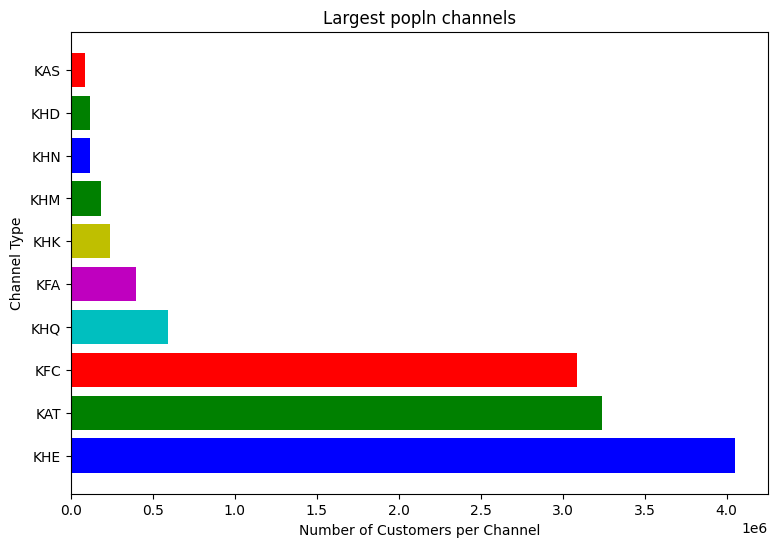

In [22]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
fig, axes = plt.subplots(figsize = (9,6))
axes.barh(custchannel.index, custchannel.values,color= colors)
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers per Channel')
axes.set_title('Largest popln channels')
axes.legend
plt.show()

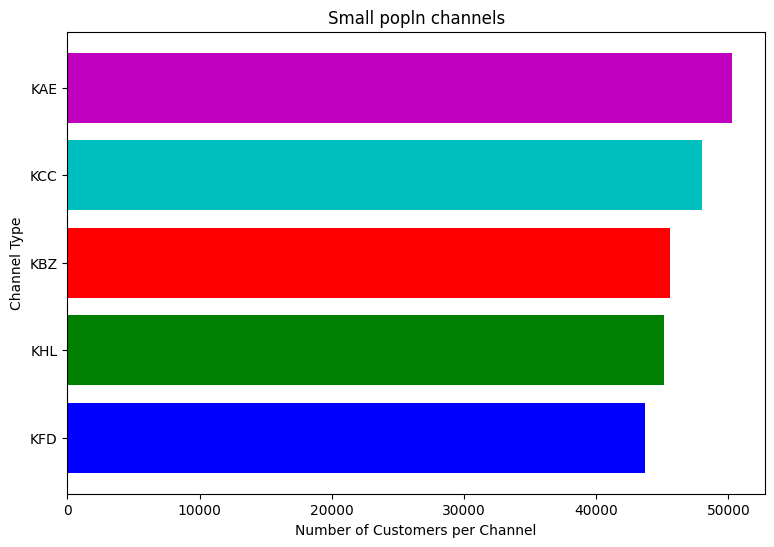

In [23]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
fig, axes = plt.subplots(figsize = (9,6))
axes.barh(custchannel2.index, custchannel2.values,color= colors)
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers per Channel')
axes.set_title('Small popln channels')
axes.legend
plt.show()

In [ ]:
# Savings account holders across provinces:

In [25]:
province=dftrain.groupby(['Province_name','Saving_account']).nunique()['Customer_code']
province=province.reset_index()
province

,Province_name,Saving_account,Customer_code
0,ALAVA,0,2643
1,ALBACETE,0,7893
2,ALICANTE,0,22441
3,ALMERIA,0,4367
4,ASTURIAS,0,18537
...,...,...,...
65,VALLADOLID,0,16256
66,VALLADOLID,1,2
67,ZAMORA,0,3474
68,ZARAGOZA,0,23366


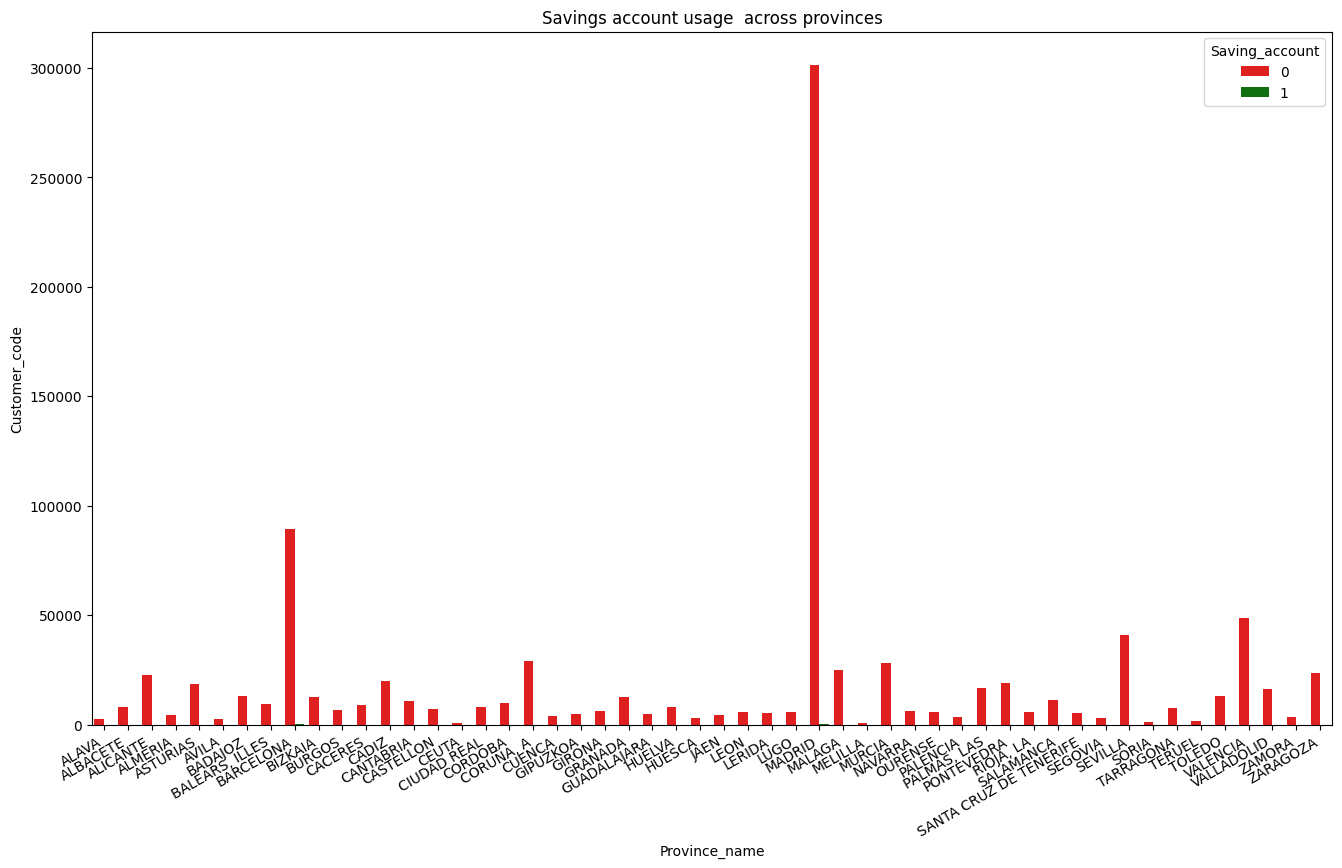

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Savings account usage  across provinces')
sns.barplot(data=province,hue='Saving_account',x='Province_name',y='Customer_code',palette=['red','green'])
plt.xticks(rotation=30, ha='right')
plt.show()

Provice Madrid tops in non saving account holders 

In [ ]:
province2=dftrain.groupby(['Province_name','Current_accounts']).nunique()['Customer_code']
province2=province2.reset_index()

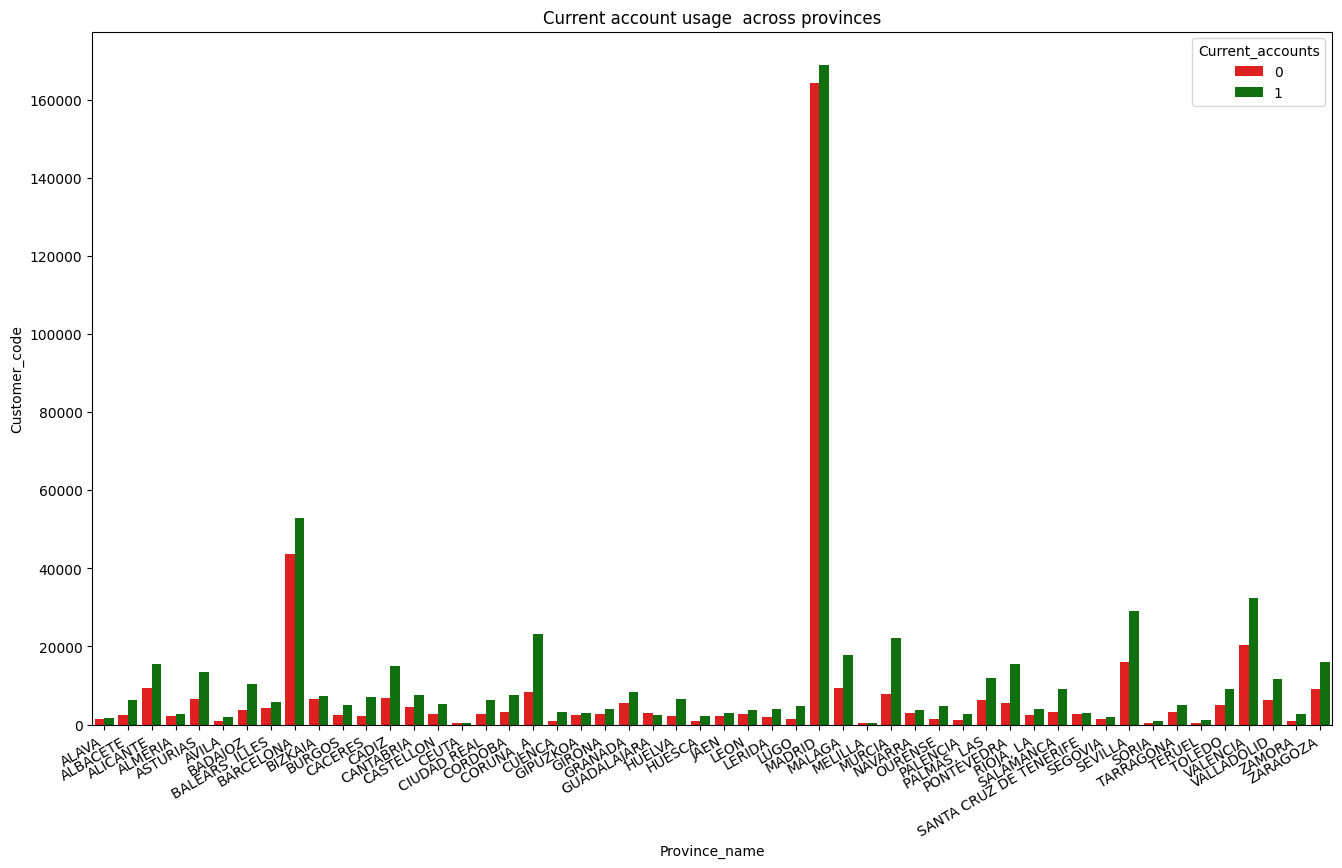

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Current account usage  across provinces')
sns.barplot(data=province2,hue='Current_accounts',x='Province_name',y='Customer_code',palette=['red','green'])
plt.xticks(rotation=30, ha='right')
plt.show()

Madrid has highest current account holders followed by Barcelona and Valladolid

In [ ]:
province3=dftrain.groupby(['Province_name','Short_term_deposits']).nunique()['Customer_code']
province3=province3.reset_index()

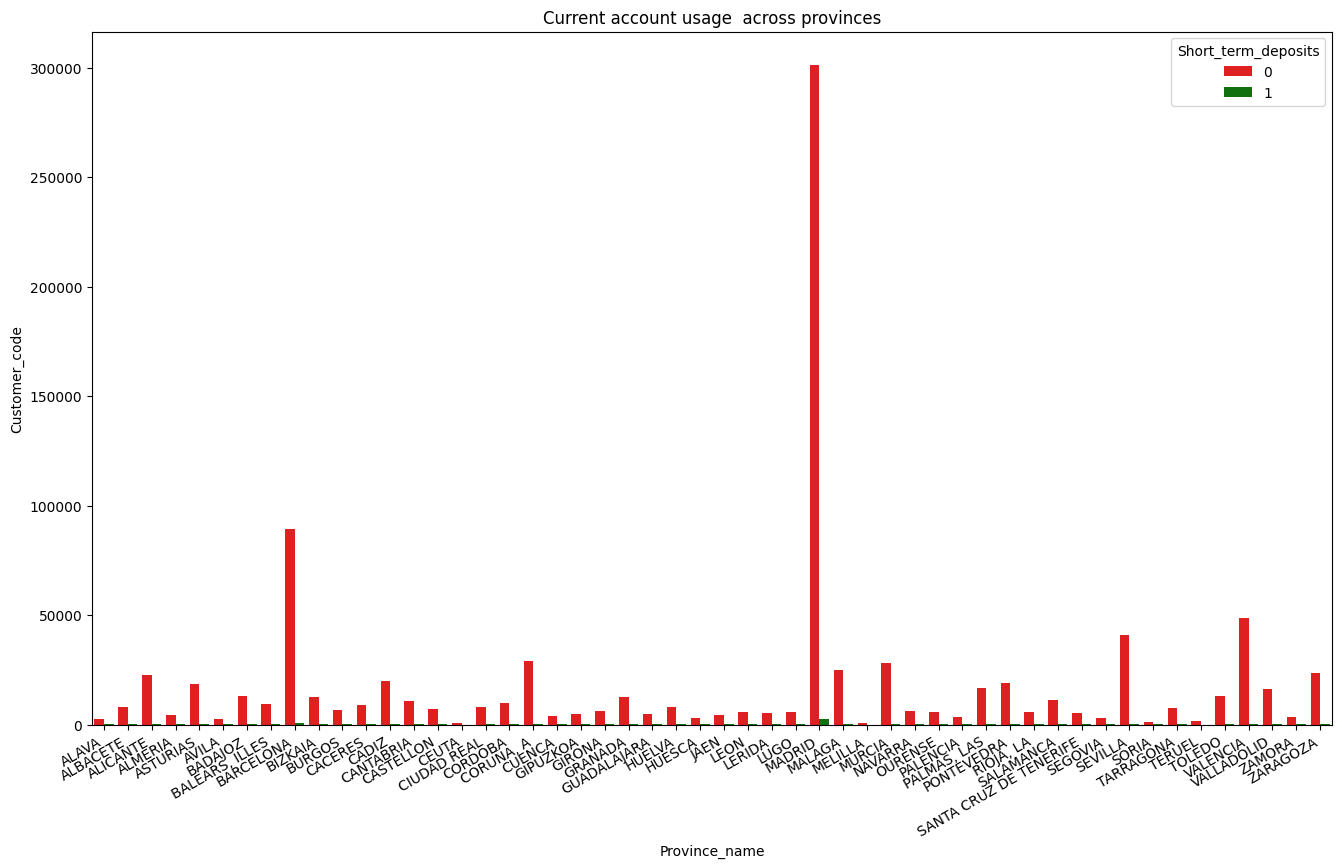

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Short_term_deposits usage  across provinces')
sns.barplot(data=province3,hue='Short_term_deposits',x='Province_name',y='Customer_code',palette=['red','green'])
plt.xticks(rotation=30, ha='right')
plt.show()

In [43]:
custprovince=dftrain.groupby(['Province_name']).count()['Customer_code']
c=custprovince.index
d=custprovince.values

custprovince=custprovince.nlargest(20)
custprovince

Province_name
MADRID         4366253
BARCELONA      1259677
VALENCIA        671560
SEVILLA         599116
CORUÑA, A       424062
MURCIA          390542
MALAGA          363910
ZARAGOZA        338511
ALICANTE        308346
CADIZ           291469
PONTEVEDRA      275998
ASTURIAS        262350
VALLADOLID      235769
PALMAS, LAS     232070
BADAJOZ         190875
BIZKAIA         184488
TOLEDO          180519
GRANADA         176565
SALAMANCA       162202
CANTABRIA       153508
Name: Customer_code, dtype: int64

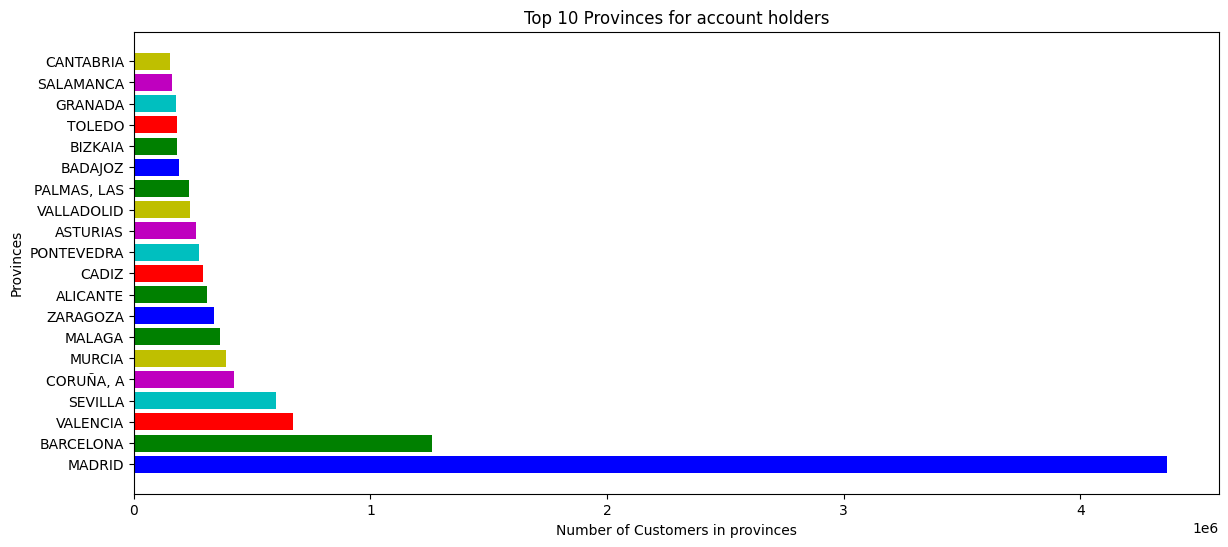

In [44]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
fig, axes = plt.subplots(figsize = (14,6))
axes.barh(custprovince.index, custprovince.values,color= colors)
plt.ylabel('Provinces')
plt.xlabel('Number of Customers in provinces')
axes.set_title('Top 10 Provinces for account holders')
axes.legend
plt.show()

In [45]:
custprovince2=custprovince.nsmallest(5)
custprovince2

Province_name
CANTABRIA    153508
SALAMANCA    162202
GRANADA      176565
TOLEDO       180519
BIZKAIA      184488
Name: Customer_code, dtype: int64

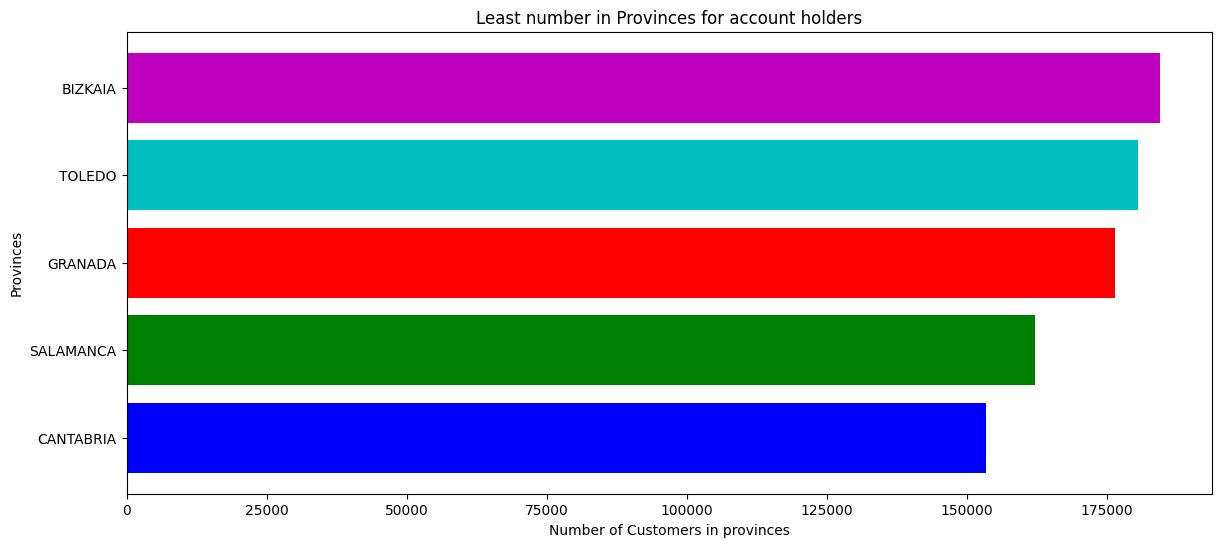

In [47]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
fig, axes = plt.subplots(figsize = (14,6))
axes.barh(custprovince2.index, custprovince2.values,color= colors)
plt.ylabel('Provinces')
plt.xlabel('Number of Customers in provinces')
axes.set_title('Least number in Provinces for account holders')
axes.legend
plt.show()

The above depictions show the population of customers across different provinces in Latin America

In [ ]:
# Summing the total number of multiple bank products each customer is holding:

In [34]:
dftrain['Product_sum']=dftrain['Saving_account']+dftrain['Guarantees']+dftrain['Current_accounts']+dftrain['Derivative_account']+dftrain['Payroll_account']+dftrain['Junior_account']+dftrain['More_private_account']+dftrain['Private_account']+dftrain['Private_plus_account']+dftrain['Short_term_deposits']+dftrain['Medium_term_deposits']+dftrain['Long_term_deposits']+dftrain['E_account']+dftrain['Funds']+dftrain['Mortgage']+dftrain['Pensions']+dftrain['Loans']+dftrain['Taxes']+dftrain['Credit_card']+dftrain['Securities']+dftrain['Home_account']+dftrain['Payroll']+dftrain['Pensions_2']+dftrain['Direct_debit']

In [35]:
dftrain['Product_sum'].value_counts(ascending=False)

1.0     7040309
0.0     2459422
2.0     1912470
3.0      765608
4.0      447667
5.0      288625
6.0      210395
7.0      141282
8.0       76030
9.0       33738
10.0      12651
11.0       4341
12.0       1124
13.0        230
14.0         26
15.0          9
Name: Product_sum, dtype: int64

Only one product usage customers are highest while 15(highest holders) product usage customers are the least in the population

In [37]:
# Customer province and products purchased:

province4=dftrain.groupby(['Province_name','Product_sum']).nunique()['Customer_code']
province4=province4.reset_index()

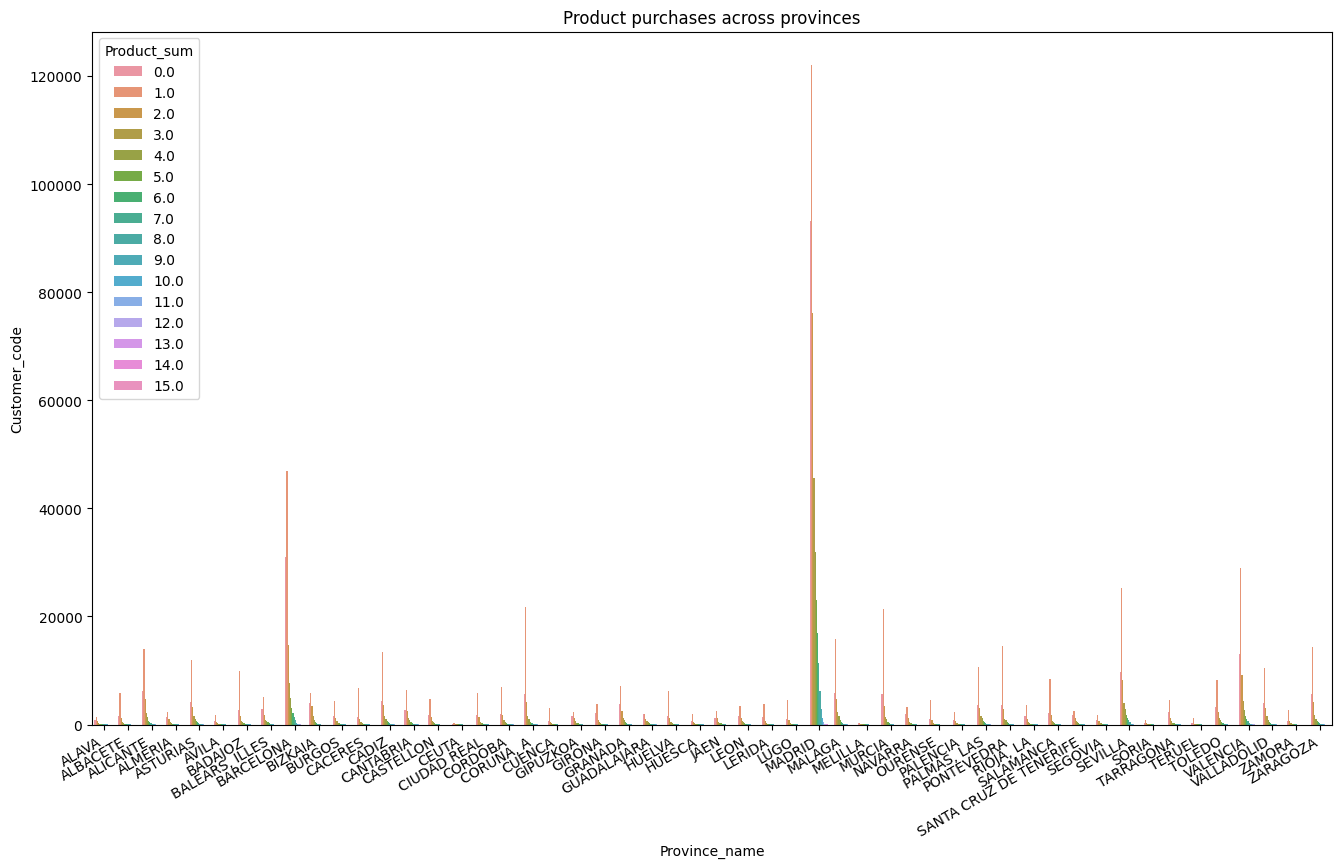

In [39]:
plt.figure(figsize=(16,9))
plt.title('Product purchases across provinces')
sns.barplot(data=province4,hue='Product_sum',x='Province_name',y='Customer_code')
plt.xticks(rotation=30, ha='right')
plt.show()

In [48]:
gincome=dftrain.groupby(['Gross_income','Product_sum']).nunique()['Customer_code']
gincome=gincome.reset_index()

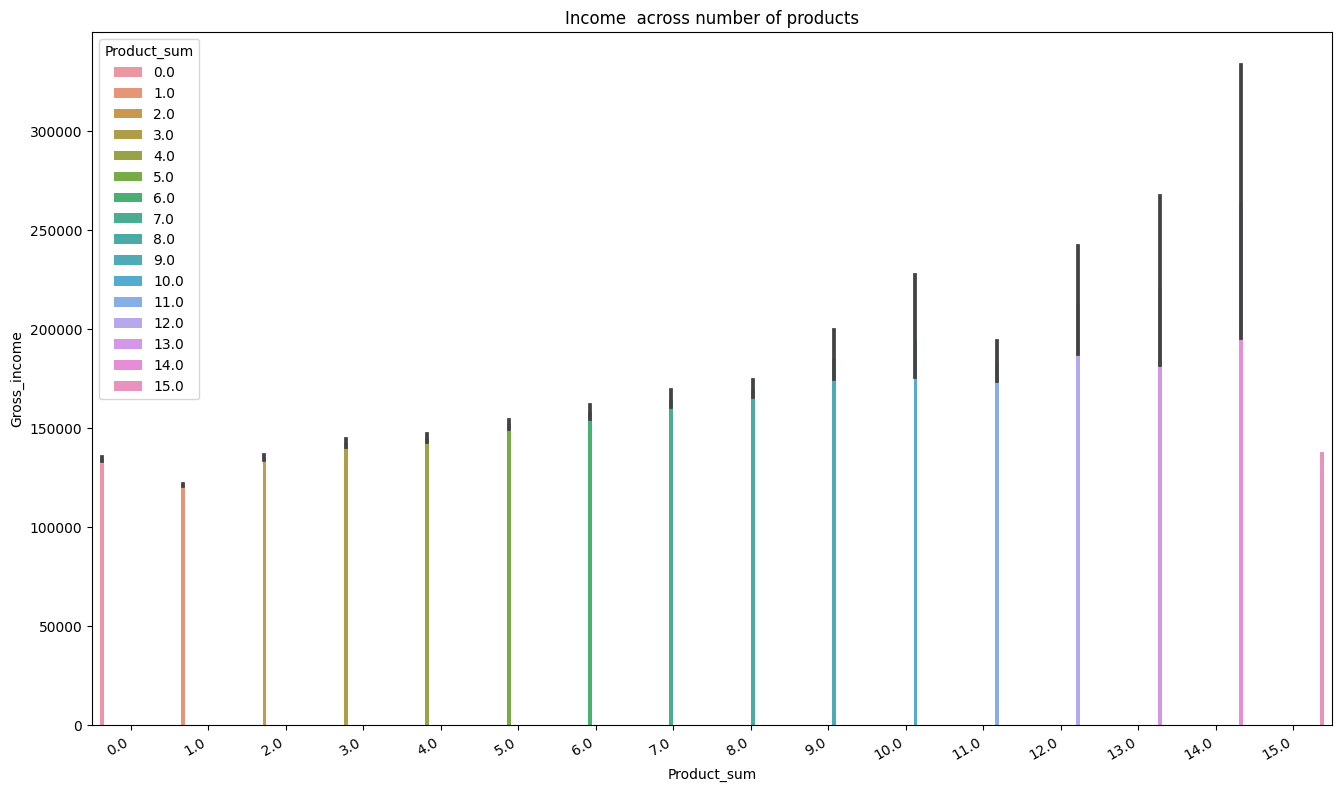

In [51]:
plt.figure(figsize=(16,9))
plt.title('Income  across number of products')
sns.barplot(data=gincome,hue='Product_sum',x='Product_sum',y='Gross_income')
plt.xticks(rotation=30, ha='right')
plt.show()

In [52]:
#Correlation between Gross_income and number of product purchases:

corr2=dftrain['Product_sum'].corr(dftrain['Gross_income'])
corr2

-0.007607203366850556

Gross income depicts a negative correlation with the number of products customers hold

In [ ]:
# Product purchases among active and inactive customers:

In [74]:
act=dftrain.groupby('Activity_index')
act=act.Product_sum.sum()
ind=act.index
values=act.values


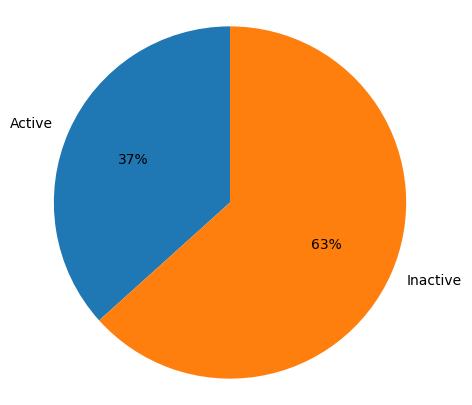

In [77]:
figp,axp=plt.subplots(figsize=(5,5))
axp.pie(values,labels=ind, autopct='%1.0f%%',startangle=90)
plt.axis('equal')
plt.show()

In [81]:
 #Contingency tables:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import scipy.stats as scs
dftrain['Residence_index']=[1 if v == 'Yes' else 0 for v in dftrain['Residence_index']]
dftrain['Product_sum']=[1 if v == 1 else 0 for v in dftrain['Product_sum']]

In [82]:
residence=pd.crosstab(dftrain["Residence_index"], dftrain["Product_sum"], margins = False)
residence

Product_sum,0,1
Residence_index,,
0,6353618,7040309


In [56]:
scs.chi2_contingency(residence)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[6353618., 7040309.]]))

In [57]:
dftrain['Foreigner_index']=[1 if v == 'Yes' else 0 for v in dftrain['Foreigner_index']]


In [59]:
foreigner=pd.crosstab(dftrain["Foreigner_index"], dftrain["Product_sum"], margins = False)
foreigner

Product_sum,0,1
Foreigner_index,,
0,6056777,6754418
1,296841,285891


In [60]:
scs.chi2_contingency(foreigner)

Chi2ContingencyResult(statistic=2998.089688519007, pvalue=0.0, dof=1, expected_freq=array([[6077189.9946528, 6734005.0053472],
       [ 276428.0053472,  306303.9946528]]))

In [78]:
dftrain['Activity_index']=[1 if v == 'Active' else 0 for v in dftrain['Activity_index']]

In [79]:
active=pd.crosstab(dftrain["Activity_index"], dftrain["Product_sum"], margins = False)
active

Product_sum,0,1
Activity_index,,
0,2781627,4458562
1,3571991,2581747


In [80]:
scs.chi2_contingency(active)

Chi2ContingencyResult(statistic=513894.68646173965, pvalue=0.0, dof=1, expected_freq=array([[3434496.48141296, 3805692.51858704],
       [2919121.51858704, 3234616.48141296]]))

# Hypothesis Testing

In [ ]:
#Hypothesis-1
#H0:There is no statistically significant effect of the gross income of customers who purchase multiple products
#H1:There is a statistically significant effect of the gross income of customers who purchase multiple products?

In [22]:
_,pvalue1=stats.ttest_ind(dftrain['Gross_income'][dftrain['Product_sum'] == 1.0],
                dftrain['Gross_income'][dftrain['Product_sum'] > 1.0],equal_var=True)

In [23]:
print(pvalue1)

1.0843772433038879e-16


In [25]:
if (pvalue1 < 0.05):
    print('Accept alternative H1 that Gross_income does have significant effect on the purchase of multiple products as the p-value <0.05')
else: print('Reject alternative H1 and accept Null hypothesis that Gross_income does not have significant effect on the purchase of multiple products as the p-value <0.05')

Accept alternative H1 that Gross_income does have significant effect on the purchase of multiple products as the p-value <0.05


In [ ]:
#Hypothesis-2
#H0:There is no statistically significant effect of the segment of customers(Individuals/College-graduates/Vips) and the income factor 
#H1:There is a statistically significant effect of the segment of customers(Individuals/College-graduates/Vips)  and the income factor 

In [96]:
_,pvalue2=stats.ttest_ind(dftrain['Gross_income'][dftrain['Segmentation'] == 'Individual'],
                dftrain['Gross_income'][dftrain['Segmentation']!= 'Individual'],equal_var=True)

In [97]:
print(pvalue2)

0.03936859918528484


In [100]:
if (pvalue2 < 0.05):
    print('Accept alternative H1 that income does have significant effect on the segment of the customers as the p-value <0.05')
else: print('Reject alternative H1 that income does have significant effect on the segment of the customers as the p-value <0.05')

Accept alternative H1 that income does have significant effect on the segment of the customers as the p-value <0.05


#EDA Summary and Recommendations

EDA summary:
* 99% customers belong to the same country of residence as that of the bank
*95% customers are Latin America(foreign_index) nationals
* Inference if customer is spouse or not of an employee is infeasible
*There are more number of Inactive Customers than Active Customer
 Active-45.9% and Inactive-54%
*There are approximately 7901219 individuals,4930286 college graduates and 558361 VIPs have accounts with bank XYZ Credit Union 
*Individual account holders are higher income generaters also from the same residence as the bank
*Channel KHE and KAT have the highest medium for customers while KFE  has the least mode for customers 
*Current_accounts top among the product purchases across provinces
*Highest number of customers hail from Provice Madrid and the lowest number of customers are from province Cantabria
*Gross income is higher among people with multiple account holders

Recommendations:
* Introducing loyalty programs and benefits for existing inactive customers to involve and explore relevant banking products to increse revenue through them
*Establisments of more banking facilities and XYZ branches across provinces with lower customer strength 
*For provinces with higher customer presence like Madrid,Barcelona engaging customers with new or unique programs in mortgages(for businesses), travel/foreigner accounts(leisure activity,travel industry),insurances ,car loans etc.
*Marketing through a broad spectrum of Channels and introducing engament programs will increase the customer presence throughout demographics
*Engaging more with college-graduates with their upcoming transitions may be from short term account to long term, in terms of Education loans,travel insurances, rental loans 

